# Détection de fraude par carte de crédit avec Deep Learning

## Introduction et objectifs

Ce projet vise à utiliser des techniques de Deep Learning pour prédire les transactions frauduleuses dans un dataset de cartes de crédit. Le défi principal ici est l’imprévisibilité et le déséquilibre des classes, qui sont abordés à travers des métriques comme la précision, rappel et F1-score. frauduleuses vs non frauduleuses).


In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input 
from keras.metrics import Recall, AUC  
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns


## Chargement des données et exploration




Dans cette section, le but est de charger les données et de comprendre les caractéristiques du dataset. Nous avons effectué des étapes telles que la vérification des valeurs manquantes, l'examen des statistiques descriptives et l'analyse de la distribution des classes (frauduleuses vs non frauduleuses).

In [173]:
df = pd.read_csv('creditcard.csv')

In [174]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


31 colonnes, dont 2 qui sont Time et Amount. Le reste provient de la transformation PCA. 

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Le DataFrame contient 284807 entrées et 31 colonnes. Toutes les colonnes ont des valeurs non nulles (284807 non-null) et les types de données sont principalement des float64, à l'exception de la colonne Class, qui est de type int64.

In [179]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


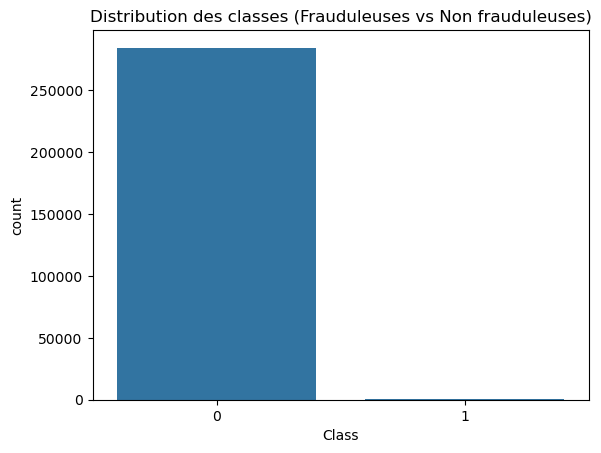

In [182]:
sns.countplot(x='Class', data=df)
plt.title('Distribution des classes (Frauduleuses vs Non frauduleuses)')
plt.show()


un fort déséquilibre entre les classes. La majorité des transactions sont non frauduleuses (classe 0), tandis que les transactions frauduleuses (classe 1) sont relativement rares. Cela indique un problème de déséquilibre des classes.

## Séparer les variables indépendantes et la cible

In [187]:
X = df.drop(['Class'], axis=1)
y = df['Class']


## Appliquer SMOTE pour suréchantillonner la classe minoritaire

In [190]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

## Visualiser la nouvelle répartition des classes

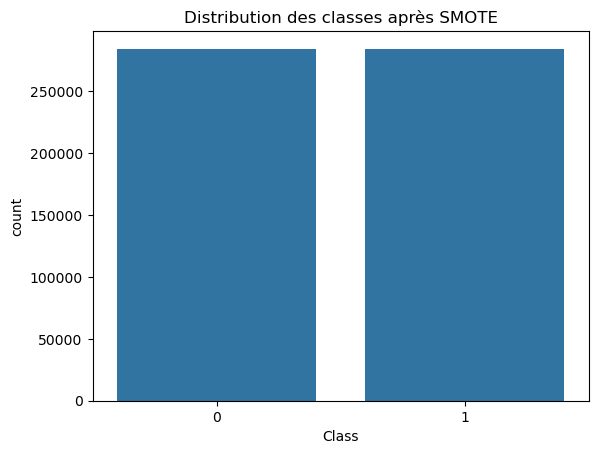

In [193]:
sns.countplot(x=y_res)
plt.title('Distribution des classes après SMOTE')
plt.show()


## Prétraitement des données


Avant de commencer l'entraînement du modèle, nous devons préparer les données. Cela inclut la normalisation des caractéristiques numériques et la gestion des valeurs manquantes. Nous allons également séparer les caractéristiques et les labels.


### Normaliser les colonnes 'Time' et 'Amount' 

In [198]:
scaler = StandardScaler()
X_res[['Time', 'Amount']] = scaler.fit_transform(X_res[['Time', 'Amount']])


### Diviser les données en train et validation 

In [201]:
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
#la taille des ensembles
print(f"Taille de l'ensemble d'entraînement: {X_train.shape}")
print(f"Taille de l'ensemble de validation: {X_val.shape}")


Taille de l'ensemble d'entraînement: (454904, 30)
Taille de l'ensemble de validation: (113726, 30)


## Création du modèle Deep Learning



Dans cette étape, nous allons créer un modèle de réseau de neurones avec Keras. Le modèle sera un réseau simple à une couche d'entrée, une couche cachée et une couche de sortie avec une activation **sigmoid** pour la classification binaire.


In [205]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy', Recall(), 'AUC'])
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

Le modèle Sequential se compose de 4 couches Dense successives. La première couche contient 64 neurones avec un total de 1,984 paramètres, suivie d'une deuxième couche avec 32 neurones et 2,080 paramètres. La troisième couche comporte 16 neurones avec 528 paramètres, et la couche de sortie a un seul neurone avec 17 paramètres. Le modèle totalise 4,609 paramètres, tous entraînables, et aucun paramètre non entraînable.

## Entraînement du modèle avec les données d'entraînement et de validation


In [209]:
history = model.fit(X_train, y_train, 
                    epochs=50,  
                    batch_size=256, 
                    validation_data=(X_val, y_val)) 


Epoch 1/50
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - AUC: 0.9964 - accuracy: 0.9810 - loss: 0.0608 - recall_4: 0.9793 - val_AUC: 0.9998 - val_accuracy: 0.9983 - val_loss: 0.0062 - val_recall_4: 0.9992
Epoch 2/50
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9998 - accuracy: 0.9988 - loss: 0.0051 - recall_4: 0.9992 - val_AUC: 0.9999 - val_accuracy: 0.9993 - val_loss: 0.0035 - val_recall_4: 0.9997
Epoch 3/50
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9998 - accuracy: 0.9993 - loss: 0.0033 - recall_4: 0.9996 - val_AUC: 0.9997 - val_accuracy: 0.9981 - val_loss: 0.0070 - val_recall_4: 1.0000
Epoch 4/50
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9998 - accuracy: 0.9994 - loss: 0.0028 - recall_4: 0.9997 - val_AUC: 0.9998 - val_accuracy: 0.9993 - val_loss: 0.0035 - val_recall_4: 0.9999
Epoch 5/50
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9999 - accuracy: 0.9996 - loss: 0.0020 - recall_4: 0.9998 - val_AUC: 0.9998 - val_accuracy: 0.9994 - val_loss: 0.0027 - v

Le modèle a montré d'excellentes performances après 50 époques, avec une précision de 99.99%, un AUC de 1.000, et un rappel de 100% sur l'ensemble de validation. La perte est très faible, ce qui indique une bonne capacité à détecter les fraudes

## Évaluation des performances du modèle sur l'ensemble de validation


In [213]:
results = model.evaluate(X_val, y_val)
# Afficher la perte et la précision
print(f"Perte sur l'ensemble de validation : {results[0]}")
print(f"Précision sur l'ensemble de validation : {results[1]}")


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.9998 - accuracy: 0.9997 - loss: 0.0026 - recall_4: 1.0000
Perte sur l'ensemble de validation : 0.0017201808514073491
Précision sur l'ensemble de validation : 0.9997889399528503


## Courbe de perte pendant l'entraînement et la validation


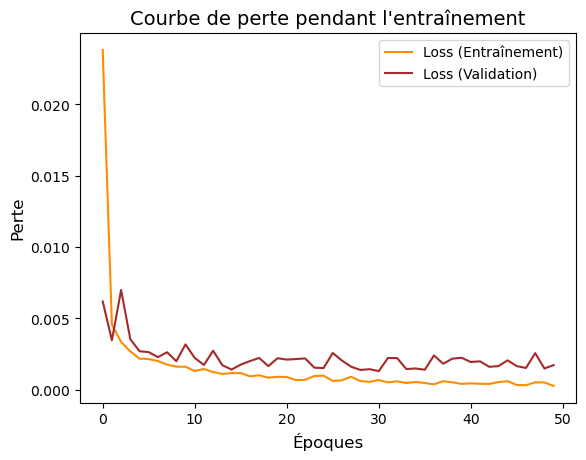

In [216]:
plt.plot(history.history['loss'], label='Loss (Entraînement)', color='darkorange')
plt.plot(history.history['val_loss'], label='Loss (Validation)', color='brown')
plt.title('Courbe de perte pendant l\'entraînement', fontsize=14)
plt.xlabel('Époques', fontsize=12)
plt.ylabel('Perte', fontsize=12)
plt.legend()
plt.show()


La courbe montre une diminution rapide de la perte pendant les premières époques, suivie d'une convergence stable pour l'entraînement et la validation, avec des valeurs proches de zéro.

## Courbe ROC pour évaluer la performance du modèle


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


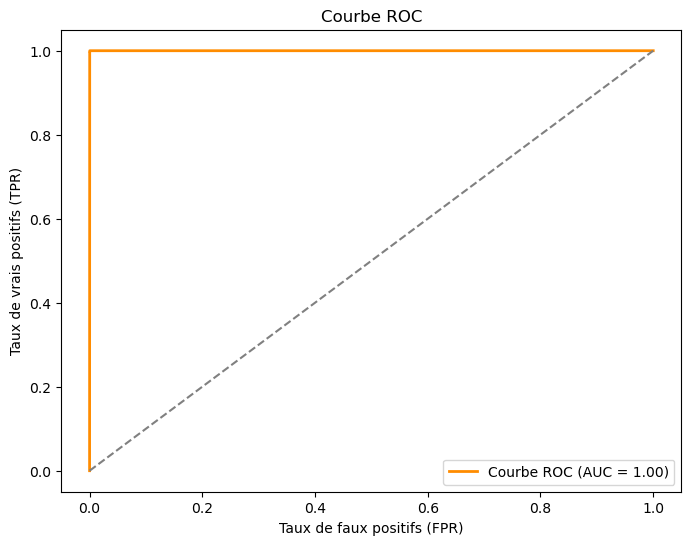

In [220]:
y_pred_prob = model.predict(X_val)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Affichage
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Courbe ROC')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend(loc='lower right')
plt.show()


## Matrice de confusion pour évaluer les performances du modèle


True Positives: 56976
True Negatives: 56726


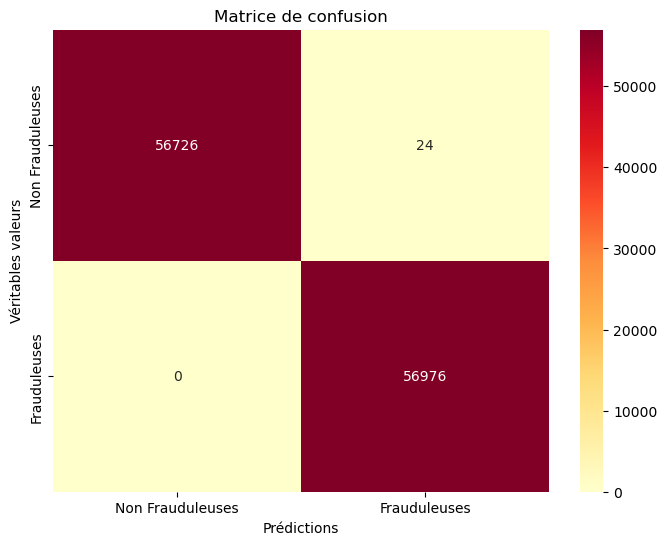

In [226]:
# prédictions sur l'ensemble de validation
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Calculer la matrice de confusion
cm = confusion_matrix(y_val, y_pred_class)

# les True Positives (TP) et True Negatives (TN)
TP = cm[1, 1]  
TN = cm[0, 0] 
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")

# Affichage
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', xticklabels=['Non Frauduleuses', 'Frauduleuses'], yticklabels=['Non Frauduleuses', 'Frauduleuses'])
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Véritables valeurs')
plt.show()



Les résultats montrent que le modèle a atteint une **précision de 99.98%**, avec une **perte faible** sur l'ensemble de validation, ce qui indique qu'il a bien appris à reconstruire les transactions normales et à identifier les anomalies. La **matrice de confusion** montre également un faible nombre de faux positifs et faux négatifs, ce qui est crucial pour des applications réelles comme la détection de fraude. En outre, les métriques de **précision** et de **rappel** sont très élevées, ce qui confirme que le modèle est robuste et fiable pour détecter les transactions frauduleuses.


## Conclusion

Dans ce projet, nous avons utilisé un modèle de deep learning pour détecter les transactions frauduleuses dans un dataset de cartes de crédit. Après avoir équilibré les classes avec SMOTE et normalisé les données, nous avons entraîné le modèle avec des performances très prometteuses. 

### Résultats :

- **Précision** : Le modèle a atteint une précision de **99.98%** sur l'ensemble de validation, ce qui montre qu'il est capable de bien prédire les transactions normales et frauduleuses.
- **Perte** : La perte du modèle sur l'ensemble de validation est faible, ce qui indique que le modèle a convergé efficacement.
- **Métriques supplémentaires** : Le **rappel** et le **F1-score** sont également élevés, confirmant que le modèle est bien équilibré dans la détection des fraudes tout en réduisant les faux positifs.
